# 4 Exploring Canopy Water Content (CWC) and Land Surface Temperature (LST) across Vegetation Types in the Jack and Laura Dangermond Preserve

**Authors**  
Christiana Ade<sup>1</sup> and Marie Johnson<sup>1,2</sup> 
1. Jet Propulsion Laboratory, California Institute of Technology  
2. University of Montana

**Summary**  
In this notebook, we will examine how Canopy Water Content (CWC) derived from EMIT data and Land Surface Temperature (LST) derived from ECOSTRESS change across three different vegetation types and dates in the Jack and Laura Dangermond preserve.

>Note in previous notebooks, we referenced the CWC product as Equivalent Water Thickness (EWT) because water signal can still be retrieved from non-vegetated surfaces. But, here we will be investigating vegetated surfaces and will reference it as CWC.*

**Learning Objectives**  
- Use product time series related to a real life scenario concerning invasive species in nature preserves. 

**Background**  

In 2017, The Nature Conservancy (TNC) acquired the preserve through a generous donation from Jack and Laura Dangermond. The preserve is 24,460 acres of a former private ranch situated at Point Conception, California. Point conception represents the boundary between Northern and Southern California, which separates terrestrial, marine, and coastal ecoregions. This is one of only a few areas globally where the boundary between marine and terrestrial ecosystems exist together. The preserve is one of the last "wild coast" areas in Southern California and it has some of the highest biodiversity globally. The Dangermond Preserve offers a unique opportunity to study the impacts of global change; sea level rise, the intensification of wildfire and drought providing a natural laboratory.

The preserve is naturally composed of oak tree forests and native grasslands; however, in recent years it faces several invasion issues from non-native grasses and iceplant (*Carpobrotus spp.*). The currently mapped invasive plant species at the Preserve include non-native grasslands, iceplant  mats, and stands of black mustard (*Brassica nigra*), poison hemlock (*Conium maculatum*), thistles, and fennel (*Foeniculum vulgare*). Iceplant is one of the priority species listed under the preserve's invasive species management plan.

<figure align="center">
  <img src="../img/dangermond_use_case/ice_plant_close_up.jpg" width="200" height="200"/>
  <img src="../img/dangermond_use_case/ice_plant_flower.jpg" width="200" height="200"/>
    <img src="../img/dangermond_use_case/iceplant_beach.jpg" width="200" height="200"/>
    <figcaption>Figure 1. Iceplants along California's coastline.</figcaption> 
</figure>
Iceplant is an invasive species native to South Africa that was introduced to California in the 1500s. Because of its ability to stabilize soil in the 1950’s, the Department of Transportation used iceplant to prevent erosion on roadsides. This practice lasted for 20 years before it was discontinued, however, many homeowners still use iceplant for landscaping today. Although iceplant can help prevent coastal erosion, it threatens coastal biodiversity. Iceplant takes up a large amount of soil moisture, thereby taking moisture away from other species. It can also inhibit the establishment of native grass species as a result of a high nitrate accumulation in iceplant soils. Current management efforts to eradicate iceplant at the Dangermond Preserve include cattle grazing. TNC is interested in utilizing enhanced remote sensing techniques to understand iceplant characteristics and detect iceplant locations. 

<figure align="center">
  <img src="../img/dangermond_use_case/invasive_species_map_TNC.png" width="300">
  <figcaption>Figure 2. Invasive species locations at the perserve in 2021.</figcaption>  
</figure>
                                                        
**Exercise information**

The cropped EMIT and ECOSTRESS imagery used in this notebook were created using code from previous tutorial notebooks. We have simply cropped this imagery to the Dangermond boundaries and saved them to the openscapes. As a reference, the tutorial code needed crop EMTI and ECOSTRESS products is in `02_Working_with_EMIT_Reflectance_and_ECOSTRESS_LST.ipynb` in sections *2.2.3 Cropping EMIT data to a Region of Interest*, *2.2.4 Write an output*, *2.3.2 Cropping ECOSTRESS Data*, and *2.3.3 Writing Outputs*.

**Tutorial references**  
01_Finding_Concurrent_Data.ipynb 
- In this notebook we learned how to use earthacces to find concurrent EMIT and ECOSTRESS data
- We also learned how to export a list of files and download them programatically.

02_Working_with_EMIT_Reflectance_and_ECOSTRESS_LST.ipynb
- How to open and work with EMIT L2A Reflectance and ECOSTRESS L2T LSTE data
- How to apply a quality mask to EMIT datasets
- How to reproject and regrid data
- How to crop EMIT and ECOSTRESS data

03_EMIT_CWC_from_Reflectance.ipynb
- Calculate the EWT of a single pixel 
- Calculate the EWT of a ROI


**Required datasets**  
1. Image datasets:
   This imagery has already been processed and uploaded to openscapes using code from previous notebooks. We will use three dates in 2023 to represent different seasons: April 1st, June 29th, and September 23rd. For a visualization of this imagery check out our quick visualization code. [TODO] insert link here

- EMIT Canopy Water Content
    - EMIT_L2A_RFL_001_20230401T203751_2309114_002_dangermond_cwc.tif
    - EMIT_L2A_RFL_001_20230629T170449_2318011_002_dangermond_cwc.tif
    - EMIT_L2A_RFL_001_20230923T232101_2326615_002_dangermond_cwc.tif

- ECOSTRESS Land Surface Temperature
    - ECOv002_L2T_LSTE_26860_001_10SGD_20230401T203733_0710_01_LST_dangermond.tif
    - ECOv002_L2T_LSTE_28238_012_10SGD_20230629T170416_0710_01_LST_dangermond.tif
    - ECOv002_L2T_LSTE_29576_005_10SGD_20230923T232104_0710_01_LST_dangermond.tif
    

2.  Vector datasets: 
    - veg_plots_outline.geojson : This file includes polygons of delinated vegetation plots of iceplant, non-native grassland, and coastal live oak polygons. This file was created specifically for this tutorial and the polygons were delinated using vegtation maps of Dangermond and field data collected during the [SHIFT campaign.](https://climate.nasa.gov/news/3157/california-field-campaign-is-helping-scientists-protect-diverse-ecosystems/)

**Tutorial Outline**  

4.1 View the CWC and LST images along with the vegetation class polygons  
4.2 Extract the CWC Raster Values  
4.3 Make a boxplot of CWC Extracted Values  
4.4 Extract and create box plot of LST images  
4.5 Investigate and discuss the differences between vegetation classes and dates for both CWC and LST  
4.6 Interactive playground! - Create your own polygons for extraction  
    
**References** 
* Bossard, C. C., Randall, J. M., & Hoshovsky, M. C. (Eds.). (2000). Invasive Plants of California's Wildlands. University of California Press.
* Butterfield, H.S., M. Reynolds, M.G. Gleason, M. Merrifield, B.S. Cohen, W.N. Heady, D. Cameron, T. Rick, E. Inlander, M. Katkowski, L. Riege, J. Knapp, S. Gennet, G. Gorga, K. Lin, K. Easterday, B. Leahy and M. Bell. 2019. Jack and Laura Dangermond Preserve Integrated Resources Management Plan. The Nature Conservancy. 112 pages.  
* [TODO: cite image https://centralcoastparks.org/ice-plant-the-iconic-but-destructive-piece-of-california-coastal-landscape/
https://sanctuaries.noaa.gov/news/feb15/invasive-species.html]

# To do:
- (taken from your notes) ADD SOME COMMENTARY About what we are seeing and how the bottom patch is iceplant in the cell after the loop to visualize the change in CWC through time
- I partally updated the LST to display maps but didn't change things after that (you'll see where I stopped editing from the large text box)
- I didn't change anything in the interactive playground
- I changed the color ramp to blues for CWC and reds for LST. Althoug

## Setup

In [1]:
# Import required packages 
import os
import glob
import math
import earthaccess
import numpy as np
import pandas as pd
import xarray as xr
from osgeo import gdal
import rasterio as rio
import rioxarray as rxr
from rioxarray.merge import merge_arrays
from matplotlib import pyplot as plt
import hvplot.xarray
import hvplot.pandas
import holoviews as hv
import geoviews as gv
import geopandas as gp
import sys
from modules.emit_tools import emit_xarray, ortho_xr
import re
import warnings
import panel as pn

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Polygon

## 4.1 View the vegetation polygons and the EMIT CWC products

Let's make a list called `cwc_list` of all the available cropped EMIT CWC images by searching for tifs in our image directory `cropped/dangermond/ewt/`. 

In [2]:
# data directory - location of all images cropped to dangermond. Includes subfolders for ewt and lst. 
data_dir = "../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond"
# list all files in the ewt sub-directory of the data_dir path that end in tif
cwc_list = glob.glob(os.path.join(data_dir, "ewt", "*.tif"))
cwc_list

['../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230401T203751_2309114_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230219T202939_2305013_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230422T195924_2311213_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230405T190311_2309513_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20231014T224006_2328715_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230923T232101_2326615_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230219T202951_2305013_003_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermon

`cwc_list` is a list of nine previously processed EMIT scenes over Dangermond. However, several of those scenes do not capture the full preserve. 
In Parts 1-5 of the notebook, we fill focus on three dates by making a filtered list of the cwc files called`fil_cwc_list`. We will use these dates to subset
- Spring: 2023-04-01
- Summer: 2023-06-29
- Fall:   2023-09-23

In [3]:
# the date and time codes strings we want to select from our larger cwc_list
cwc_dates = ['20230401T203751', '20230629T170449', '20230923T232101']
# this is written as a loop so that the files appear dates would appear chronologically like our cwc_date list
fil_cwc_list = [] # empty list
for date in cwc_dates:
    # filter for appropriate dates and then add back
    fil_cwc_list.extend([file for file in cwc_list if date in file])
fil_cwc_list

['../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230401T203751_2309114_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230629T170449_2318011_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230923T232101_2326615_002_dangermond_cwc.tif']

Next we will write a loop to visualize the change in CWC through time. 


In [4]:
# Initialize an empty list to store the plots
plots = []

# Iterate over each CWC file and create a plot
for file in fil_cwc_list:
    # Open the raster file
    ras = rxr.open_rasterio(file).squeeze('band', drop=True)
    
    # extract the date string from the file name using string matching
    ras_date =  re.search(r"\d{8}", file).group()
    date_object = datetime.strptime(ras_date, "%Y%m%d")
    date_only = date_object.date()#.strftime("%Y-%m-%d")
    
    # Create a plot using geoviews
    plot = ras.hvplot.image(x='x', y='y', geo=True, cmap='blues',
                                                    tiles='ESRI', 
                                                    title=f"{date_only} {ras.long_name} ({ras.units})",
                                                    xlabel='Longitude', ylabel='Latitude',
                                                    frame_width=400, frame_height= 300,
                                                    fontscale=1, alpha=0.7)
    
    # Add the plot to the list
    plots.append(plot)

# Display all plots in a grid layout using Panel
grid = pn.GridSpec(sizing_mode='stretch_both')
for i, plot in enumerate(plots):
    grid[i // 2, i % 2] = plot  # Adjust 3 to change the number of columns

grid.servable()

GridSpec(ncols=2, nrows=2, sizing_mode='stretch_both')
    [0] HoloViews(Overlay, sizing_mode='stretch_both')
    [1] HoloViews(Overlay, sizing_mode='stretch_both')
    [2] HoloViews(Overlay, sizing_mode='stretch_both')

#TODO - **NEED TO UPDATE ADD SOME COMMENTARY About what we are seeing and how the bottom patch is iceplant**

### Load Vegetation Polygons

Here we will load previously selected vegetation plots of iceplant, coastal live oak and non native grasslands from the `veg_plots_outline.geojson` as the variable `veg_poly`. These plots come from a combination of field data and previous maps created for Dangermond preserve management. 

<figure align="center">
  <img src="../img/dangermond_use_case/veg_plot_types.png" width="700" height="200">
  <figcaption>Figure 3. Examples of the different vegetation types in the veg_plots_outline.geojson .</figcaption>  
</figure>


In [5]:
# read in veg polygons
veg_poly = gp.read_file("../data/veg_plots_outline.geojson")

In [6]:
# let's load in one image from september for the plot visualization 
cw3 = rxr.open_rasterio(fil_cwc_list[2]).squeeze('band',drop=True)

Let's visualize this polygon dataset on top of the CWC from September. On the left side you will see `plot_1`, which has the the vegetation plots all in red overlayed on the September CWC. While on the right side you will see `plot 2` which is the vegetation plots colored by each of the three different classes in the geojson file. 

Important note for plot 1 code, in order to get the vegetation polygons to overlay we needed to use the star expression `*` and convert the veg_poly crs to `EPSG:3857`, which is the projection commonly used for web mapping. Even though `cw3` and `veg_poly` originally had the same CRS, the `holoviews` package reprojects `cw3` on the fly to `EPSG:3857` for web mapping when we used `hvplot.image`. Therefore, we have to make the same transformation using `veg_poly.to_crs('EPSG:3857')`




In [7]:
warnings.filterwarnings('ignore') # We are supressing warnings for this cell since the package is just warning us that the function will change in a future package version.

# plot one reference 
plot_1 = cw3.hvplot.image(x='x',y='y',geo=True, cmap='blues',tiles='ESRI',
                          title=f"{cw3.long_name} ({cw3.units})",
                          xlabel='Longitude',ylabel='Latitude', frame_width=300,
                          frame_height=300, fontscale=1, alpha = 0.7) * veg_poly.to_crs('EPSG:3857').hvplot(c='red',alpha=1)
 
plot_2 = veg_poly.hvplot.polygons(geo=True, c='Class', hover_cols='all', 
                                         xlabel='Longitude',ylabel='Latitude', frame_width=300,
                                         frame_height=300, fontscale=1, title='Dangermond Vegetation Plots')

plot_1 + plot_2


:Layout
   .Overlay.I  :Overlay
      .Tiles.I    :Tiles   [x,y]
      .Image.I    :Image   [x,y]   (value)
      .Polygons.I :Polygons   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (Class,index,id)

To zoom in click the `box` or `wheel` zoom icon.

### 4.2 Extract CWC Pixel Values from Vegetation Polygons

In this section, we will use a previously written extract function called `extract_raster_values` from the accompanying script `jlpd_ras_funcs.py`. This script has all complex functions written for this notebook which is why we are using `import *.`. The other fucntions will be referenced later in the interactive portion of the notebook.

In [8]:
# This is one way to load functions written from another script
from modules.jldp_ras_funcs import *

Here we will create a loop to extract the raster values from every pixel in each polygon of the `veg_plots_outline.shp` file for the spring, summer, and fall `cwc dates` that we chose. The final output dataframe file will be called `subset_df`.

In [9]:
ex_df = [] # Create an empty list to store extracted values in

for r in fil_cwc_list:
    ras = rxr.open_rasterio(r).squeeze('band', drop=True) # Open raster
    ras.data[ras.data == -9999] = np.nan # Set NA value to -9999
    ex_ras = extract_raster_values(ras, veg_poly) # Extract raster values
    
    date_object = datetime.strptime(ras.attrs['time_coverage_end'], "%Y-%m-%dT%H:%M:%S%z") # Extract date from raster
    date_only = date_object.date()
    ex_ras['rasDate'] = date_only # Add date to new column in data frame
    ex_df.append(ex_ras) # Append to list

ex_cwc = pd.concat(ex_df).reset_index(drop=True)
ex_cwc.rename(columns={'value': 'CWC'}, inplace=True) # Rename column value to CWC
ex_cwc['CWC'].replace(-9999, np.nan, inplace=True) # Replace -9999 with NA in the CWC column
ex_cwc = ex_cwc.dropna(subset=['CWC']) # Remove rows with NA values in the CWC column

In [10]:
# Preview list
ex_cwc.head()

x          y  spatial_ref  CWC  \
0 -120.461840  34.452859            0  0.5   
1 -120.461840  34.452317            0  0.5   
2 -120.461840  34.451775            0  0.5   
3 -120.461840  34.451233            0  0.5   
4 -120.461297  34.452859            0  0.5   

                              cell_number  id      Class  \
0   34.45285946671181_-120.46183955389516   0  ice_plant   
1   34.45231723419155_-120.46183955389516   0  ice_plant   
2  34.451775001671294_-120.46183955389516   0  ice_plant   
3  34.451232769151034_-120.46183955389516   0  ice_plant   
4    34.45285946671181_-120.4612973213749   0  ice_plant   

                                            geometry     rasDate  
0  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
1  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
2  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
3  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
4  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01

Let's make a quick boxplot of our extracted values across seasons just to check that our extract function worked. 

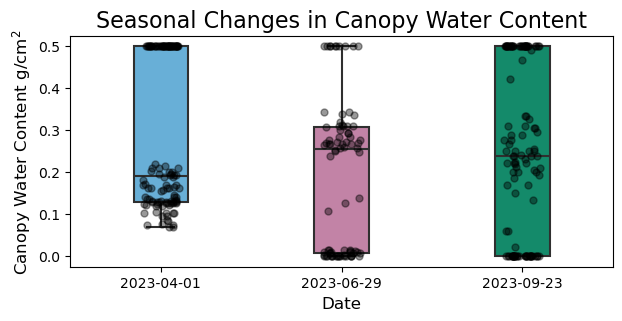

In [11]:
fig, ax = plt.subplots(figsize=(7,3))
# add boxplot 
b = sns.boxplot(x = 'rasDate', 
                y = 'CWC', 
                data = ex_cwc,
                ax = ax,
               width = 0.3,
               palette = {"#56B4E9", "#009E73", "#CC79A7"}) # Create color palette
b.set_ylabel("Canopy Water Content g/cm$\mathregular{^2}$", fontsize = 12)
b.set_xlabel("Date", fontsize = 12)
b.set_title("Seasonal Changes in Canopy Water Content", fontsize = 16)

# overlay points for all values
b = sns.stripplot(data = ex_cwc,
                       x = 'rasDate', 
                       y = 'CWC', 
                       ax = ax,
                      color = "black", # Colours the dots
                      linewidth = 1,     # Dot outline width
                      alpha = 0.4)       # Makes them transparent

## 4.3 Generate Boxplots of CWC Across Vegetation types

Great! We manged to extract all the pixel values, but we are more interested in investigating the differences across type and **vegetation plot type**. Here, we separate the above plot into three faceted plots, one for each vegetation type. The final plot is called `p_class`. 


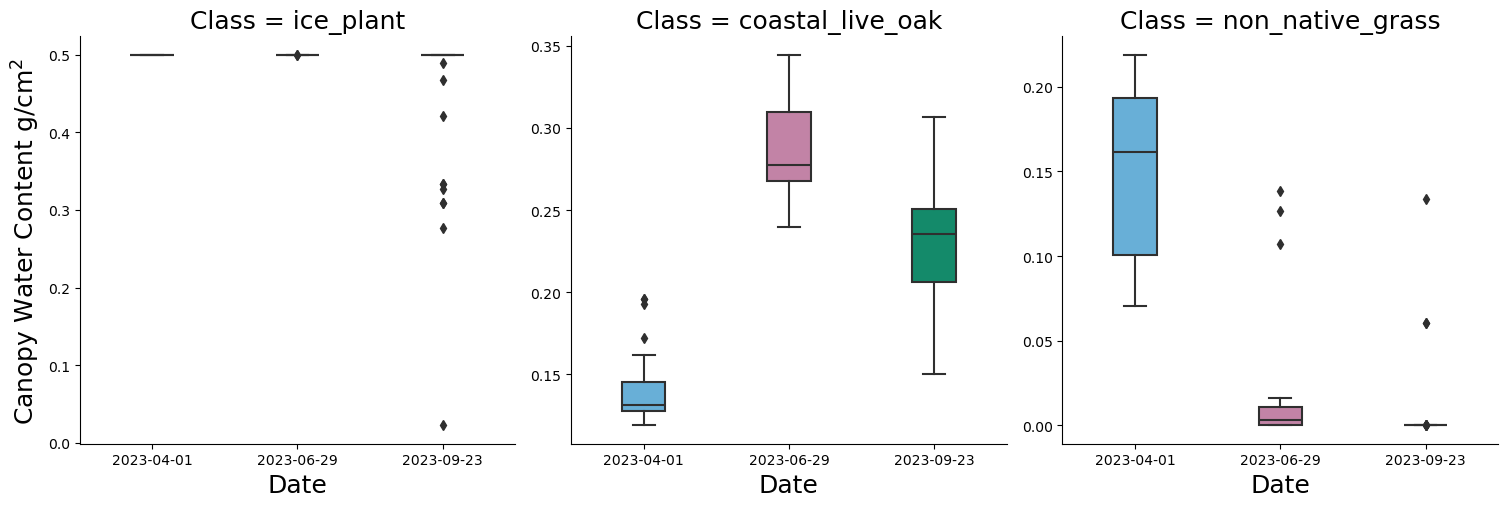

In [12]:
warnings.filterwarnings('ignore') # We are supressing warnings for this cell since the package is just warning us that the function will change in a future package version.

p_class = sns.catplot(
    x='rasDate', 
    y='CWC', 
    col='Class',  # This will create a separate plot for each unique value in the 'Class' column
    data=ex_cwc, 
    kind='box',
    col_wrap=3,  # Adjust this depending on how many plots per row you want
    sharex=False, 
    sharey=False,
    height=5, 
    aspect=1,
    width = 0.3,
    palette = {"#56B4E9", "#009E73", "#CC79A7"}
)

p_class.set_titles(size = 18)
p_class.set_xlabels("Date", fontsize = 18)
p_class.set_ylabels("Canopy Water Content g/cm$\mathregular{^2}$", fontsize = 18)

<div class="alert alert-success"> What changes in CWC do you see across vegetation types and dates?</div>

## 4.4 Extract LST values and create corresponding boxplot

We are also interested in looking at changes in LST across time, so let's repeat a similar process to extract LST values by vegetation type. The final extracted data frame is called `final_df_lst`

#TODO - **NEED to update, so that files list is simlar to CWC** recommend final dataset be called ex_lst  
#TODO - **Do we want to keep this addition of LST in red colormap**  
#TODO - **This needs some additional markdown/explanation of what's happening between the cells below**

In [13]:
# data directory - location of all images cropped to dangermond. Includes subfolders for ewt and lst. 
# data_dir = "../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond" # already loaded
# list all files in the ewt sub-directory of the data_dir path that end in tif
lst_list = glob.glob(os.path.join(data_dir, "lst", "*.tif"))
lst_list

['../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_26921_001_10SGD_20230405T190258_0710_01_LST_dangermond.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_29901_007_10SGD_20231014T223936_0711_01_LST_dangermond.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_29576_005_10SGD_20230923T232104_0710_01_LST_dangermond.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_28238_012_10SGD_20230629T170416_0710_01_LST_dangermond.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_26860_001_10SGD_20230401T203733_0710_01_LST_dangermond.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_26223_012_10SGD_20230219T202943_0710_01_LST_dangermond.tif']

In [14]:
# the date and time codes strings we want to select from our larger lst_list
lst_dates = ['20230401T203733', '20230629T170416', '20230923T232104']
# this is written as a loop so that the files appear dates would appear chronologically like our cwc_date list
fil_lst_list = [] # empty list
for date in lst_dates:
    # filter for appropriate dates and then add back
    fil_lst_list.extend([file for file in lst_list if date in file])
fil_lst_list

['../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_26860_001_10SGD_20230401T203733_0710_01_LST_dangermond.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_28238_012_10SGD_20230629T170416_0710_01_LST_dangermond.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_29576_005_10SGD_20230923T232104_0710_01_LST_dangermond.tif']

In [15]:
# Initialize an empty list to store the plots
plots = []

# Iterate over each LST file and create a plot
for file in fil_lst_list:
    # Open the raster file
    ras = rxr.open_rasterio(file).squeeze('band', drop=True)
    
    # extract the date string from the file name using string matching
    ras_date =  re.search(r"\d{8}", file).group()
    date_object = datetime.strptime(ras_date, "%Y%m%d")
    date_only = date_object.date()#.strftime("%Y-%m-%d")
    ras -= 273.15  # Convert Kelvin to Celsius
    
    # Add attributes for plotting
    long_name_value = "Land Surface Temperature"
    ras.attrs['long_name'] = long_name_value
    units_value = "°C"  # Change the units to Celsius
    ras.attrs['units'] = units_value
    
    # Create a plot using geoviews
    plot = ras.hvplot.image(x='x', y='y', geo=True, cmap='reds',
                                                    tiles='ESRI', 
                                                    title=f"{date_only} {ras.long_name} ({ras.units})",
                                                    xlabel='Longitude', ylabel='Latitude',
                                                    frame_width=400, frame_height= 300,
                                                    fontscale=1, alpha=0.7)
    
    # Add the plot to the list
    plots.append(plot)

# Display all plots in a grid layout using Panel
grid = pn.GridSpec(sizing_mode='stretch_both')
for i, plot in enumerate(plots):
    grid[i // 2, i % 2] = plot  # Adjust 3 to change the number of columns

grid.servable()

GridSpec(ncols=2, nrows=2, sizing_mode='stretch_both')
    [0] HoloViews(Overlay, sizing_mode='stretch_both')
    [1] HoloViews(Overlay, sizing_mode='stretch_both')
    [2] HoloViews(Overlay, sizing_mode='stretch_both')

In [16]:
lst_april = "../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_26860_001_10SGD_20230401T203733_0710_01_LST_dangermond.tif"
lst_june = "../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_28238_012_10SGD_20230629T170416_0710_01_LST_dangermond.tif"
lst_sep = "../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/lst/ECOv002_L2T_LSTE_29576_005_10SGD_20230923T232104_0710_01_LST_dangermond.tif"

In [17]:
lst_List = [lst_april, lst_june, lst_sep]
ex_df_lst = []
for r in lst_List:
    # extract values 
    ras = rxr.open_rasterio(r).squeeze('band',drop=True)
    ex_ras = extract_raster_values(ras, veg_poly)
    
    # add date to the dataframe
    rDate =  re.search(r"\d{8}", r).group()
    date_object = datetime.strptime(rDate, "%Y%m%d")
    date_only = date_object.date()#.strftime("%Y-%m-%d")
    
    # add column 
    ex_ras['rasDate'] = date_only
    # add back to data frame with all values
    ex_df_lst.append(ex_ras)

final_df_lst = pd.concat(ex_df_lst).reset_index(drop=True)
final_df_lst.rename(columns = {'value':'LST'}, inplace = True) # Rename values column to LST
final_df_lst = final_df_lst[final_df_lst['LST'] > 0 ] # Removes any value less than 0

In [18]:
final_df_lst.head()

x          y  spatial_ref         LST  \
0 -120.461840  34.452859            0  296.619995   
1 -120.461840  34.452317            0  296.619995   
2 -120.461840  34.451775            0  296.720001   
3 -120.461840  34.451233            0  296.760010   
4 -120.461297  34.452859            0  296.619995   

                              cell_number  id      Class  \
0   34.45285946671181_-120.46183955389516   0  ice_plant   
1   34.45231723419155_-120.46183955389516   0  ice_plant   
2  34.451775001671294_-120.46183955389516   0  ice_plant   
3  34.451232769151034_-120.46183955389516   0  ice_plant   
4    34.45285946671181_-120.4612973213749   0  ice_plant   

                                            geometry     rasDate  
0  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
1  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
2  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
3  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
4  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01

Let's take these values and make a box plot similar to before. 

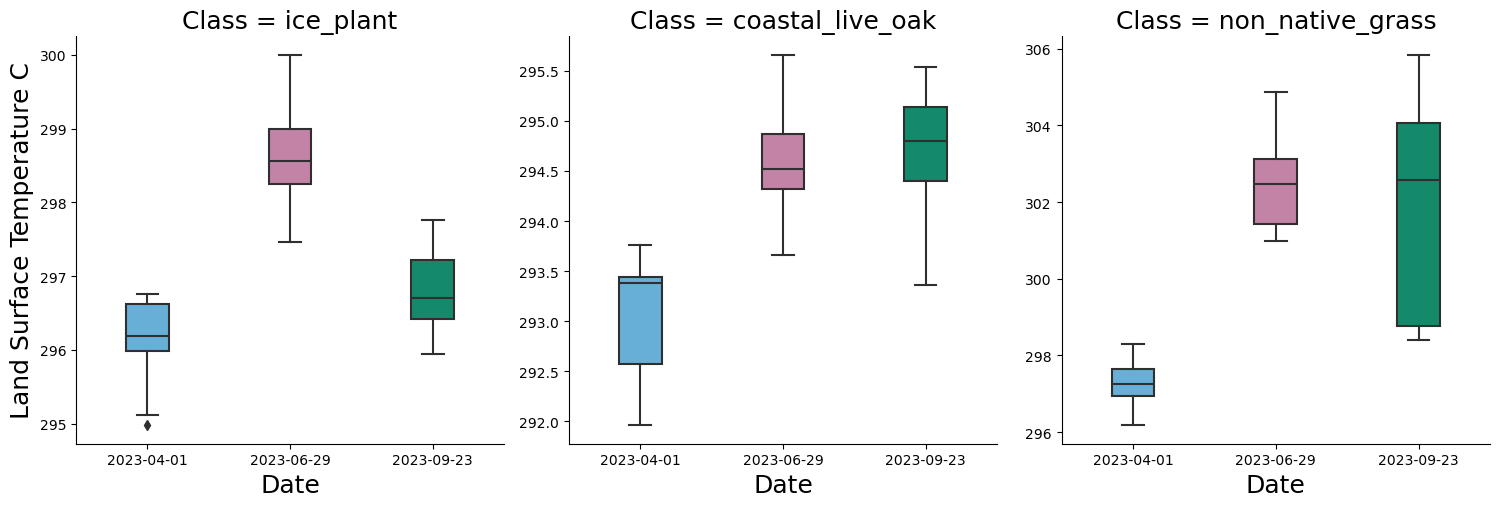

In [19]:
p_class_lst = sns.catplot(
    x='rasDate', 
    y='LST', 
    col='Class',  # This will create a separate plot for each unique value in the 'Class' column
    data=final_df_lst, 
    kind='box',
    col_wrap=3,  # Adjust this depending on how many plots per row you want
    sharex=False, 
    sharey=False,
    height=5, 
    aspect=1,
    width = 0.3,
    palette = {"#56B4E9", "#009E73", "#CC79A7"}
)
p_class_lst.set_titles(size = 18)
p_class_lst.set_xlabels("Date", fontsize = 18)
p_class_lst.set_ylabels("Land Surface Temperature C", fontsize = 18)

<div class="alert alert-success"> What changes in LST do you see across vegetation types and dates?</div>

## 4.5 Look at CWC and LST together

Often times we want to visualize two variables together, so lets look at LST and CWC side by side. We have to re-write the plotting code because of the structure of seaborne plotting. 

#TODO **Update - Make plotting notes more clear and more easy to use in the interactive portion?** 

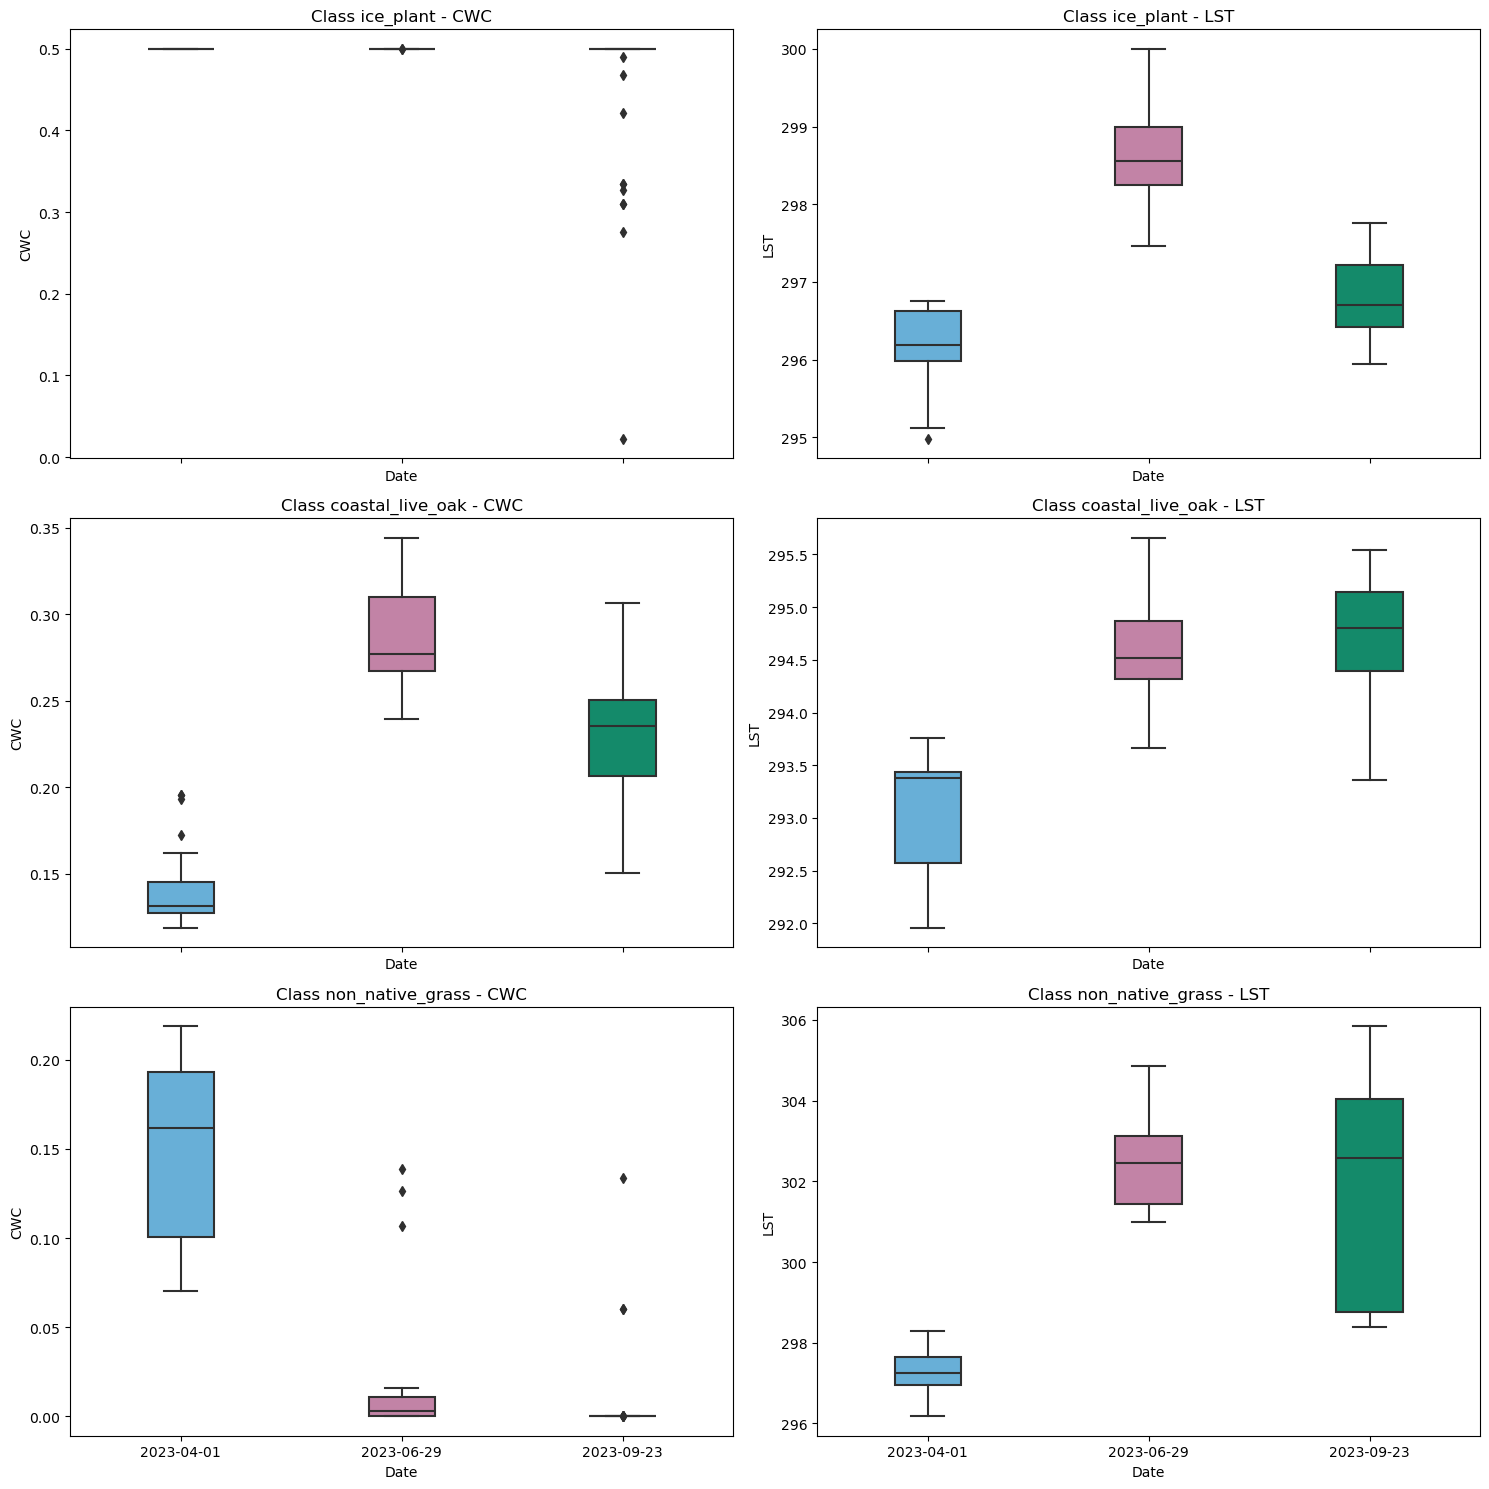

In [20]:
# Generate subplots with boxplots for different vegetation classes comparing CWC and LST
n_classes = ex_cwc['Class'].nunique()
fig, axes = plt.subplots(n_classes, 2, figsize=(15, 5 * n_classes), sharex='col')

# Iterate over each class and plot
for i, class_name in enumerate(ex_cwc['Class'].unique()):
    # Filter data for each class
    class_subset = ex_cwc[ex_cwc['Class'] == class_name]
    class_lst_subset = final_df_lst[final_df_lst['Class'] == class_name]

    # Create boxplot for CWC on the first column
    sns.boxplot(
        x='rasDate', 
        y='CWC', 
        data=class_subset, 
        ax=axes[i, 0],  # Plot on the first column
        width=0.3, 
        palette={"#56B4E9", "#009E73", "#CC79A7"}
    )

    # Create boxplot for LST on the second column
    sns.boxplot(
        x='rasDate', 
        y='LST', 
        data=class_lst_subset, 
        ax=axes[i, 1],  # Plot on the second column
        width=0.3, 
        palette={"#56B4E9", "#009E73", "#CC79A7"}
    )

    # Set titles and labels
    axes[i, 0].set_title(f'Class {class_name} - CWC')
    axes[i, 1].set_title(f'Class {class_name} - LST')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('CWC')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('LST')

# Adjust layout
plt.tight_layout()
plt.show()

#TODO <div class="alert alert-success"> **UPDATE** WRITE SOMETHING ABOUT THE CHANGES </div>

## 4.6 Interactive playground

<div class="alert alert-info"> 
    Now let's have  some fun with what you have learned and let you draw your own polygons to study vegetation change!
    </div>



There are several functions in the `jldp_ras_funcs.py` script that this section relies on. The interactive polygon portion is based on this notebook # https://github.com/auspatious/hyperspectral-notebooks/blob/main/04_EMIT_Interactive_Polygons.ipynb with added functions to reformat the output polygons into a geopandas dataframe that we can use in the same `extract_raster_values` function as before. 



Here we are limiting the amount of polygons you can draw using `POLY_LIMIT = 5` and are only displaying the canopy water content

To draw a polygon activate the Polygon Draw Tool on the right hand side. Then double click somewhere on the map to start your polygon and double click to end draing your polygon

In [21]:
ds = cw3
# if you wanted to change the background display do it here
# for example set to the Spring image
# ds = rxr.open_rasterio(fil_cwc_list[0]).squeeze('band',drop=True)

# Limit the number of drawn polygons
POLY_LIMIT = 5

# create color cycle and list of colors for the number of polygons 
color_cycle = hv.Cycle('Category10')
colors = [color_cycle[i] for i in range(POLY_LIMIT)]

# add map variable similar to before
map = ds.hvplot.image(x='x',y='y',geo=True, cmap='blues',tiles='ESRI',
                    title=f"{ds.long_name} ({ds.units})",
                 xlabel='Longitude',ylabel='Latitude', frame_width=500,
                 frame_height=500, fontscale=1.5, alpha = 0.7)


# Set up a holoviews points array to enable plotting of the clicked points
xmid = ds.x.values[int(len(ds.x) / 2)]
ymid = ds.y.values[int(len(ds.y) / 2)]

# create holoview polygons
polygons = hv.Polygons(
    [],
    kdims=["Longitude", "latitude"],
)
# stream the drawn polygons
polygons_stream = hv.streams.PolyDraw(
    data=polygons.columns(),
    source=polygons,
    num_objects=POLY_LIMIT,
    styles={'fill_color': color_cycle.values[0:POLY_LIMIT]}
)

# Plot the Map and Dynamic Map side by side
(map * polygons)



:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Image.I    :Image   [x,y]   (value)
   .Polygons.I :Polygons   [Longitude,latitude]

use `hv_stream_to_rio_geometries` to create a geojson like list of your drawn polygons.  
**TODO add more explain** 

In [23]:
# list out the geometries of the different polygons 
# TODO name something better
geometries = hv_stream_to_rio_geometries(polygons_stream.data)
contents = list(geometries)
contents

[[{'type': 'Polygon',
   'coordinates': [[[-13410491.635449268, 4090437.1648165327],
     [-13409397.590430532, 4089838.043176441],
     [-13408694.27315231, 4090332.9691784037],
     [-13409293.392169083, 4090984.18994922],
     [-13410309.29373837, 4091062.336021987],
     [-13410491.635449268, 4090437.1648165327]]]}],
 [{'type': 'Polygon',
   'coordinates': [[[-13408642.174021587, 4094110.040729851],
     [-13408642.174021587, 4093224.3817407344],
     [-13407574.173321575, 4093120.1874142652],
     [-13407678.371583024, 4093927.6977072954],
     [-13408642.174021587, 4094110.040729851]]]}]]

now use the `create_geodataframe` function from `jldp_ras_funcs.py` to format your drawn polygons similarly to our `veg_plot_outline` file. This time we will not have a class column, but will have a poly_fid column instead which represents the order in which the polygons were drawn starting with 0

In [24]:
# create a geodataframe from contents
my_poly_gdf = create_geodataframe(contents, transform_needed=True)
my_poly_gdf

poly_fid                                           geometry
0         0  POLYGON ((-120.46850 34.45778, -120.45867 34.4...
1         1  POLYGON ((-120.45188 34.48498, -120.45188 34.4...

Plot box plots for that individual raster

In [25]:
ex_ras = extract_raster_values(ds,my_poly_gdf)
ex_ras = ex_ras[ex_ras['value'] > 0 ] 


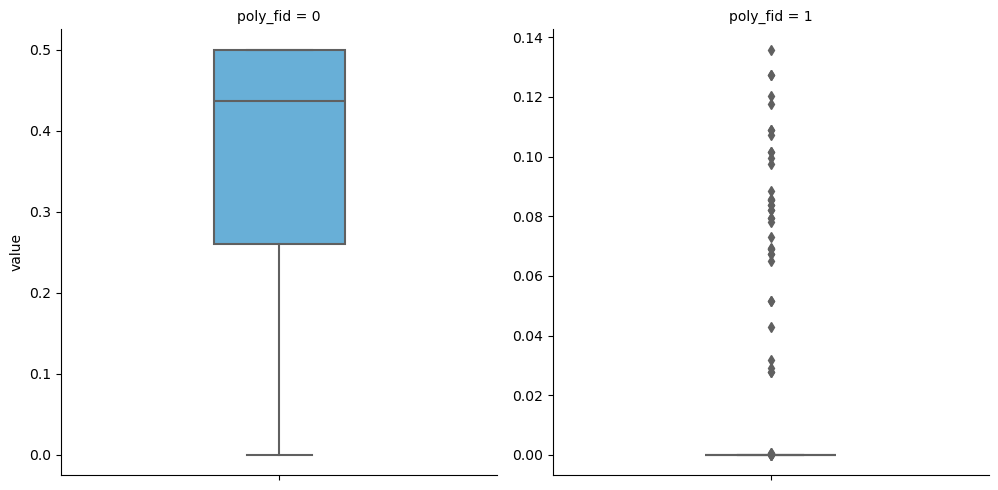

In [26]:
p_class_selected = sns.catplot(
   # x='september', 
    y='value', 
    col='poly_fid',  # This will create a separate plot for each unique value in the 'Class' column
    data=ex_ras, 
    kind='box',
    col_wrap=3,  # Adjust this depending on how many plots per row you want
    sharex=False, 
    sharey=False,
    height=5, 
    aspect=1,
    width = 0.3,
    palette = {"#56B4E9", "#009E73", "#CC79A7"}
)
p_class_lst.set_titles(size = 18)
p_class_lst.set_xlabels("Date", fontsize = 18)
p_class_lst.set_ylabels("Canopy Water Content", fontsize = 18)

### now if you noticed from before there are a few CWC images available that we did not us. Let's add two more and extract all the data from those and plot 5 CWC dates

In [27]:
# the date and time codes strings we want to select from our larger cwc_list
# for the first one we are using the merged 0219 dataset
cwc_dates = ['20230219T202939_2305013_002_dangermond_cwc_merged',
             '20230401T203751', '20230629T170449', '20230923T232101',
             '20231014T224006']
# this is written as a loop so that the files appear dates would appear chronologically like our cwc_date list
fil_cwc_list = [] # empty list
for date in cwc_dates:
    # filter for appropriate dates and then add back
    fil_cwc_list.extend([file for file in cwc_list if date in file])
fil_cwc_list

['../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230219T202939_2305013_002_dangermond_cwc_merged.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230401T203751_2309114_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230629T170449_2318011_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20230923T232101_2326615_002_dangermond_cwc.tif',
 '../../shared/2023-VITALS-Workshop-AGU/data/cropped/dangermond/ewt/EMIT_L2A_RFL_001_20231014T224006_2328715_002_dangermond_cwc.tif']

In [28]:
# Initialize an empty list to store the plots
plots = []

# Iterate over each CWC file and create a plot
for file in fil_cwc_list:
    # Open the raster file
    ras = rxr.open_rasterio(file).squeeze('band', drop=True)
    
    # extract the date string from the file name using string matching
    ras_date =  re.search(r"\d{8}", file).group()
    date_object = datetime.strptime(ras_date, "%Y%m%d")
    date_only = date_object.date()#.strftime("%Y-%m-%d")
    
    # Create a plot using geoviews
    plot = ras.hvplot.image(x='x', y='y', geo=True, cmap='blues',
                                                    tiles='ESRI', 
                                                    title=f"{date_only} {ras.long_name} ({ras.units})",
                                                    xlabel='Longitude', ylabel='Latitude',
                                                    frame_width=400, frame_height= 300,
                                                    fontscale=1, alpha=0.7)
    
    # Add the plot to the list
    plots.append(plot)

# Display all plots in a grid layout using Panel
grid = pn.GridSpec(sizing_mode='stretch_both')
for i, plot in enumerate(plots):
    grid[i // 2, i % 2] = plot  # Adjust 3 to change the number of columns

grid.servable()

GridSpec(ncols=2, nrows=3, sizing_mode='stretch_both')
    [0] HoloViews(Overlay, sizing_mode='stretch_both')
    [1] HoloViews(Overlay, sizing_mode='stretch_both')
    [2] HoloViews(Overlay, sizing_mode='stretch_both')
    [3] HoloViews(Overlay, sizing_mode='stretch_both')
    [4] HoloViews(Overlay, sizing_mode='stretch_both')

In [29]:
# create an empty list for the extracted valeus
ex_df = []
for r in fil_cwc_list:
    ## extract values
    # read in raster
    ras = rxr.open_rasterio(r).squeeze('band',drop=True)
    # set raster negative values to na
    ras.data[ras.data == -9999] = np.nan
    # use the extract function with the vegetation function
    ## HERE WE REPLACED VEG_POLY with my_poly_gdf
    ex_ras = extract_raster_values(ras, my_poly_gdf)
    
    # add date to the dataframe
    # pull the date from 
    date_object = datetime.strptime(ras.attrs['time_coverage_end'], "%Y-%m-%dT%H:%M:%S%z")
    date_only = date_object.date()
    
    # add column 
    ex_ras['rasDate'] = date_only
    # add back to data frame with all values
    ex_df.append(ex_ras)

ex_cwc_five = pd.concat(ex_df).reset_index(drop=True)

# change the name of the extracted data column
ex_cwc_five.rename(columns = {'value':'CWC'}, inplace = True)
# remove all nan values from the raster
# TODO - MARIE -- can you update this so it isn't being rehard coded like that? I don't like it 
ex_cwc_five = ex_cwc_five[ex_cwc_five['CWC'] != -9999 ] 

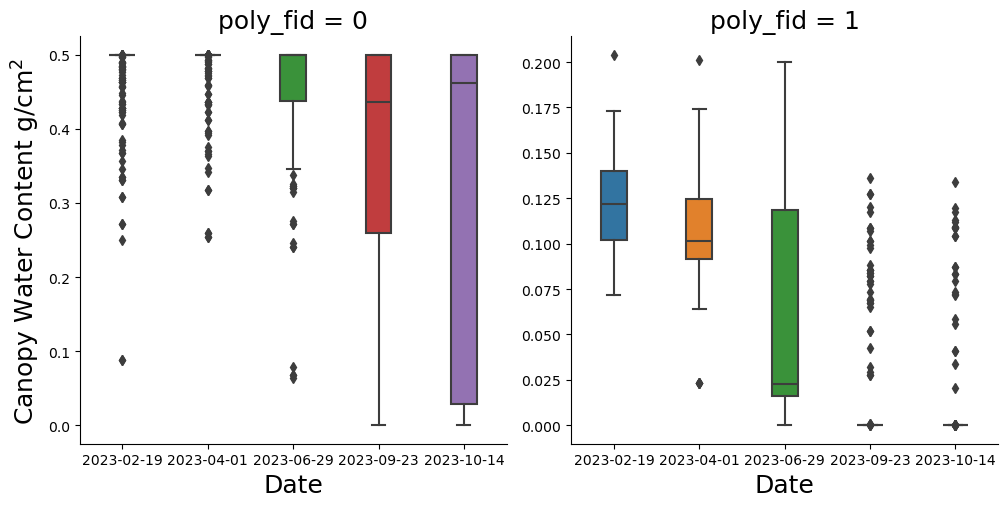

In [30]:
# we are supressing warnings for this cell since the package 
# is just warning us that the function will change in a future package version.
warnings.filterwarnings('ignore')
p_class_sel = sns.catplot(
    x='rasDate', 
    y='CWC', 
    col='poly_fid',  # This will create a separate plot for each unique value in the 'Class' column
    data=ex_cwc_five, 
    kind='box',
    col_wrap=2,  # Adjust this depending on how many plots per row you want
    sharex=False, 
    sharey=False,
    height=5, 
    aspect=1,
    width = 0.3#,
    #palette = {"#56B4E9", "#009E73", "#CC79A7"}
)

p_class_sel.set_titles(size = 18)
p_class_sel.set_xlabels("Date", fontsize = 18)
p_class_sel.set_ylabels("Canopy Water Content g/cm$\mathregular{^2}$", fontsize = 18)